<h1>Parcial 3 de Calculo numerico</h1>
Andre Villegas 30.922.327

<strong>Enunciado:</strong> Una empresa de parques de atracciones está diseñando una nueva montaña rusa y necesita que la trayectoria de la vía sea suave y continúe en todo el recorrido. Para esto, solicitan que se realice un modelo matemático que utilice un método de trazador cúbico sujeto. Además, requieren que el análisis de la estabilidad estructural de la vía se haga utilizando un polinomio de mínimos cuadrados para ajustar los datos experimentales obtenidos de las pruebas de tensión y compresión del material. El diseño también debe incluir el uso de polinomios ortogonales para optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario. Finalmente, se necesita resolver un sistema de ecuaciones para determinar las fuerzas que actúan en los puntos críticos de la estructura.

<h2><strong>Paso 1:</strong> Metodo de Trazador Cubico Sujeto</h2>
Se define el método de trazador cúbico sujeto para interpolar la trayectoria de la montaña rusa. Se supone que se tienen algunos puntos de control <em>(xi, yi)</em> por donde debe pasar la vía de la montaña rusa.<br>
El trazador cúbico sujeto requiere definir polinomios cúbicos Si <em>(x)</em> en cada intervalo <em>[xi, xi+1]</em>:

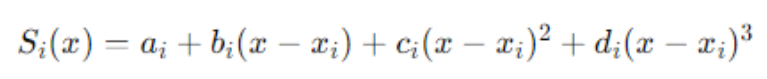

Para determinar los coeficientes <em>ai, bi, ci, di</em>, se necesita resolver un sistema de ecuaciones que asegure continuidad, suavidad y condiciones de frontera específicas.

<h2><strong>Paso 2:</strong> Polinomio de Minimos Cuadrados</h2>
Para el analisis de la estabilidad estructural, ajustamos un modelo de polinomio a los datos experimentales obtenidos de pruebas de tension y comprension del material.<br>
Suponemos que se tienen datos experimentales <em>(xi, yi)</em>. Se quiere ajustar un polinomio de grado n que minimice la suma de los errores cuadrados.

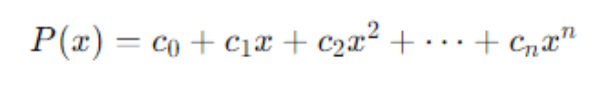

Minimizando la funcion de error:

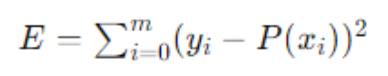

Resolviendo este problema obtenemos los coeficientes <em>c0, c1, ... , cn</em>.

<h2><strong>Paso 3:</strong> Polinomios Ortogonales</h2>
Para optimizar la forma de ciertos tramos en la via, usamos polinomios ortogonales, (Ejemplos serian: polinomios de Legendre o Chebyshev) que ayudan a minimizar errores y mejorar la experiencia del usuario.<br>
Los polinomios ortogonales <em>Pn(x)</em> son soluciones a ecuaciones diferenciales especificas y tienen la propiedad de ser ortogonales en un intervalo <em>[a, b]</em>

<h2><strong>Paso 4:</strong> Resolucion de Ecuaciones</h2>
Para determinar las fuerzas que actuan en los puntos criticos de la estructura, se necesita resolver un sistema de ecuaciones.<br>
Suponemos un sistema de ecuaciones dado por:<br>
<center><em>Ax = b</em></center><br>
Donde <em>A</em> es la matriz de coeficientes y <em>x</em> es el vector de incognitas (fuerzas en los puntos criticos), y <em>b</em> es el vector de terminos independientes.<br>
Resolviendo este sistema de ecuaciones lineales se obtienen las fuerzas en los puntos criticos.

<h2><strong>Importante</strong></h2>
<li>1. Se deben usar las librerias scipy, NumPy y MatPlotLib.</li>
<li>2. Graficar: Paso 1, Paso 2, Paso 3.</li>

<center><strong>Respuestas</strong></center>

<h2><strong>Paso 0:</strong> Declaracion de variables/obtencion de datos</h2>


In [30]:
import csv
import pandas as pd
import numpy as np

def leer_scv(archivo):
    matriz = []
    for columna in archivo:
        matriz.append(valor for valor in columna)

    return matriz

datos1 = pd.read_csv("datos_paso1(Hoja1).csv")
datos2 = pd.read_csv("datos_paso2(Hoja1).csv")
datos4 = pd.read_csv("datos_paso4(Hoja1).csv")

matriz1 = leer_scv(datos1)
matriz2 = leer_scv(datos2)
matriz4 = leer_scv(datos4)

x_datos1 = np.array(matriz1[0])
y_datos1 = np.array(matriz1[1])

x_datos2 = np.array(matriz2[0])
y_datos2 = np.array(matriz2[1])

A = np.array([datos4[0], datos4[1], datos4[2]])
b = np.array(datos4[3])

IndexError: list index out of range

<h2><strong>Paso 1:</strong> Trazado cubico</h2>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as spi
import sympy as sp

#Funcion para realizar la interpolacion cubica
def interpolacion_cubica(x_data, y_data):
    n = len(x_data)
    h = np.zeros(n - 1) #Creamos un vector de ceros de tamaño n-1 para almacenar las distancias entre los puntos
    for i in range(n - 1):
        h[i] = x_data[i + 1] - x_data[i] #Calculamos las distancias entre los puntos

    #Matrices A y B
    A = np.zeros((n-2, n-2))
    B = np.zeros(n-2)
    #Vector solucion
    S = np.zeros(n) 

    #Construimos el sistema de ecuaciones
    A[0, 0] = 2 * (h[0] + h[1])
    A[0, 1] = h[1]
    B[0] = 6 * ((y_data[2] - y_data[1]) / h[1] - (y_data[1] - y_data[0]) / h[0])

    for i in range(1, n - 2):
        #Llenamos las diagonales, inferior, principal y superior 
        A[i, i - 1] = h[i] 
        A[i, i] = 2 * (h[i] + h[i + 1]) 
        A[i, i + 1] = h[i + 1] 
        factor1 = (y_data[i + 2] - y_data[i + 1]) / h[i + 1]
        factor2 = (y_data[i + 1] - y_data[i]) / h[i] 
        B[i] = 6 * (factor1 - factor2) #Llenamos el vector B
    
    A[n - 2, n - 3] = h[n - 2] 
    A[n - 2, n - 2] = 2 * (h[n - 2] + h[n - 1]) 
    factor3 = (y_data[n] - y_data[n - 1]) / h[n - 1] 
    factor4 = (y_data[n - 1] - y_data[n - 2]) / h[n - 2] 
    B[n - 2] = 6 * (factor3 - factor4) 

    r = np.linalg.solve(A, B) 
    for j in range(1, n - 1):
        S[j] = r[j - 1] #Llenamos el vector solucion con los valores de r obtenidos

    #Condiciones de frontera
    S[0] = 0 
    S[n] = 0 

    #Generamos las matrices ai, bi, ci y di
    ai = np.zeros(n - 1)
    bi = np.zeros(n - 1)
    ci = np.zeros(n - 1)
    di = np.zeros(n - 1)

    #Calculamos los coeficientes ai, bi, ci y di
    for i in range(n - 1):
        di[i] = (S[i + 1] - S[i]) / (6 * h[i])
        ci[i] = S[i] / 2
        factor5 = (y_data[i + 1] - y_data[i]) / h[i]
        bi[i] = factor5 - (2 * h[i] * S[i] + h[i] * S[i + 1]) / 6
        ai[i] = y_data[i]

    #Generamos los polinomios
    x = sym.Symbol('x')
    polinomio = []
    for i in range(n - 1):
        polinomio.append(di[i] * (x - x_data[i]) ** 3 + ci[i] * (x - x_data[i]) ** 2 + bi[i] * (x - x_data[i]) + ai[i])

    return polinomio

#Funcion para graficar los datos
def graficar(x_data, y_data, x_vals, y_vals):
    plt.scatter(x_data, y_data, 'o', label='Datos')
    for i in range(len(y_vals)):
        plt.plot(x_vals, y_vals[i], label='Polinomio ' + str(i + 1)) #Graficamos los polinomios uno por uno
    plt.title('Interpolación cúbica')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

#Datos:
x_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([0.5, 0.8, 1.0, 0.9, 1.2, 0.7])
#Valores para graficar la curva:
x_vals = np.linspace(0, 5, 100)

#Llamamos a la funcion y obtenemos los polinomios
polinomio = interpolacion_cubica(x_data, y_data)
n = len(x_data)
for i in range(n - 1): #Sustituimos x por los valores de x_vals
    polinomio[i] = polinomio[i].subs('x', x_vals) 

#Generamos los valores de y
x = sym.Symbol('x')
y_vals = np.zeros[len(x_vals)]
for i in range(n - 1): #Sumamos los polinomios para obtener el polinomio final
    y_vals += polinomio[i]

graficar(x_data, y_data, x_vals, y_vals)

IndexError: index 4 is out of bounds for axis 1 with size 4

<h2><strong>Paso 2:</strong> Minimos cuadrados</h2>

Las medias son: Para X = 2.0. Para Y = 3.3200000000000003
Los coeficientes son: De correlacion = 0.9046649478535933. De determinacion = 0.8184186678749447
El 81.84% de los datos estan descritos en el modelo lineal


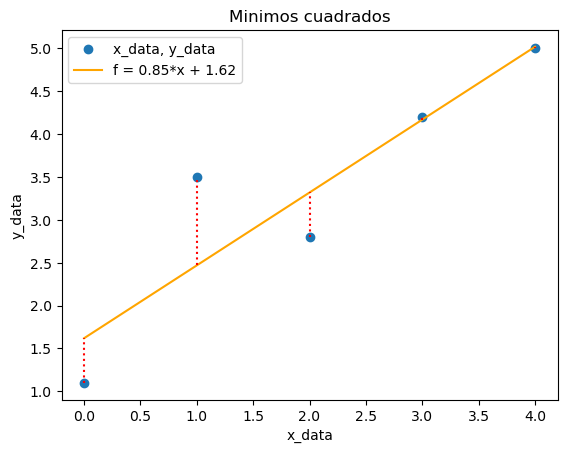

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

#Funcion para realizar el polinomio de minimos cuadrados
def minimos_cuadrados(x_data, y_data):
    #Calculamos la media de X y Y
    xm = np.mean(x_data)
    ym = np.mean(y_data)
    n = len(x_data)

    #Realizamos la sumatoria de los datos
    sumaX = np.sum(x_data)
    sumaY = np.sum(y_data)
    sumaXY = np.sum(x_data * y_data)
    sumaX2 = np.sum(x_data ** 2)
    sumaY2 = np.sum(y_data ** 2)

    #Calculamos los coeficientes
    b1 = (n*sumaXY - sumaX*sumaY)/(n*sumaX2 - sumaX**2)
    b0 = ym - b1*xm

    #Calculamos la funcion f
    x = sym.Symbol("x")
    f = b0 + b1 * x

    #Calculamos los valores de f
    fx = sym.lambdify(x, f)
    fi = fx(x_data)

    #Calculamos el coeficiente de correlacion
    numerador1 = (n * sumaXY) - (sumaX * sumaY)
    denominador1 = (np.sqrt(n*sumaX2 - (sumaX)**2))*(np.sqrt(n*sumaY2 - (sumaY)**2))
    r = numerador1/denominador1

    #Calculamos los coeficientes de determinacion
    r2 = r**2
    r2_porcentual = np.round(r2*100, 2)

    print(f"Las medias son: Para X = {xm}. Para Y = {ym}")
    print(f"Los coeficientes son: De correlacion = {r}. De determinacion = {r2}")
    print(f"El {r2_porcentual}% de los datos estan descritos en el modelo lineal")

    return fi, f

#Funcion para mostrar la grafica
def mostrar_grafica(x_data, y_data, fi, f):
    n = len(x_data)

    plt.plot(x_data, y_data, "o", label="x_data, y_data")
    plt.plot(x_data, fi, color="orange", label= "f = "+str(f))

    for i in range(0, n, 1):
        y0 = np.min([y_data[i], fi[i]])
        y1 = np.max([y_data[i], fi[i]])
        plt.vlines(x_data[i], y0, y1, color="red", linestyle="dotted")

    plt.title("Minimos cuadrados")
    plt.xlabel("x_data")
    plt.ylabel("y_data")
    plt.legend()
    plt.show()

#Datos:
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([1.1, 3.5, 2.8, 4.2, 5.0])
#Valores para graficar la curva ajustada:
x_vals = np.linspace(0, 4, 100)

mostrar_grafica(x_data, y_data, *minimos_cuadrados(x_data, y_data))

<h2><strong>Paso 3:</strong> Polinomios ortogonales</h2>

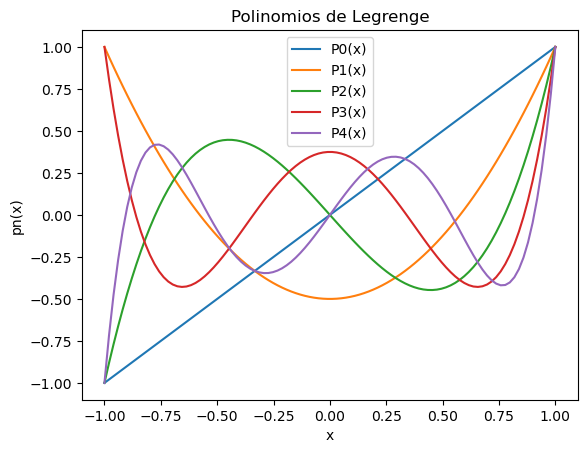

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polinomio_legendre(n, x):
    if n == 0: 
        return 1 
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * polinomio_legendre(n - 1, x) - (n - 1) * polinomio_legendre(n - 2, x)) / n

#Graficamos los polinomios de Legrenge
x = np.linspace(-1, 1, 100)
n = np.array([1, 2, 3, 4, 5])
legendre = ([])
for i in n:
    legendre.append(polinomio_legendre(i, x)) #Asignamos los valores de los polinomios de Legrenge a la lista legendre

for (j, i) in enumerate(n):
    plt.plot(x, legendre[j], label=f'P{i - 1}(x)') #Graficamos los polinomios de Legrenge

plt.title('Polinomios de Legrenge')
plt.xlabel('x')
plt.ylabel('pn(x)')
plt.legend()
plt.show()

<h2><strong>Paso 4:</strong> Resolucion de ecuaciones</h2>

La solucion es: 
Para X = -0.19999999999999998 
Para Y = 0.9333333333333335 
Para Z = 2.3333333333333335


ValueError: Argument Z must be 2-dimensional.

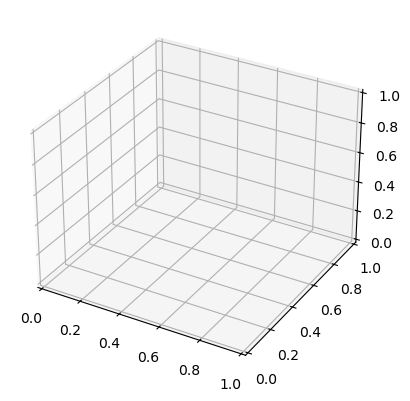

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D

def grafica_3d(x):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x[0], x[1], x[2], cmap='viridis')
    ax.title("Resolucion de ecuaciones")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()        

#Datos:
A = np.array([[1, 2, 1], [2, -1, 1], [3, 1, -1]])
b = np.array([4, 1, -2])
x = np.linalg.solve(A, b)

print(f"La solucion es: \nPara X = {x[0]} \nPara Y = {x[1]} \nPara Z = {x[2]}")
grafica_3d(x)